<a href="https://colab.research.google.com/github/akshatsanghvi211103/DIP_Project/blob/main/dip_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft


# Open the video file
cap = cv2.VideoCapture('tune.webm')
frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
print(frames)
print(fps)
# Initialize previous frame
ret, prev_frame = cap.read()
prev_frame_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
print(prev_frame_gray.shape)

# Create a HSV color image for visualizing the optical flow
hsv = np.zeros_like(prev_frame)
hsv[..., 1] = 255
hsv[..., 0] = 255
count = 0
disp = None
# curr = np.zeros((1, prev_frame_gray.shape[0], prev_frame_gray.shape[1], 2)
curr = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the current frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow
    flow = cv2.calcOpticalFlowFarneback(
        prev_frame_gray, frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    if (disp is None):
        # disp = flow[np.newaxis, ...]
        curr = np.zeros((1, flow.shape[0], flow.shape[1], flow.shape[2]))
        disp = np.zeros((1, flow.shape[0], flow.shape[1], flow.shape[2]))
    else:
        curr = curr + flow[np.newaxis, ...]
        disp = np.concatenate([disp, curr], axis=0)
    # print(disp.shape)
    # Calculate the magnitude and direction of the optical flow
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Set the hue and value according to the angle and magnitude
    # hsv[..., 0] = angle * 180 / np.pi / 2
    # np.set_printoptions(threshold = np.inf)
    # print(magnitude)
    hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV to BGR
    flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Display the frame with optical flow
    # print(flow_rgb)
    # break
    # cv2.imshow('Optical Flow', flow_rgb)

    # if cv2.waitKey(30) & 0xFF == 27:  # Press 'Esc' to exit
    #     break

    # Update the previous frame
    prev_frame_gray = frame_gray
    if (count % 10 == 0):
      print(count)
    count += 1
    # if (count == 200):
    #     break


546.0
30.0
(480, 640)
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540


523
-0.03860294117647059


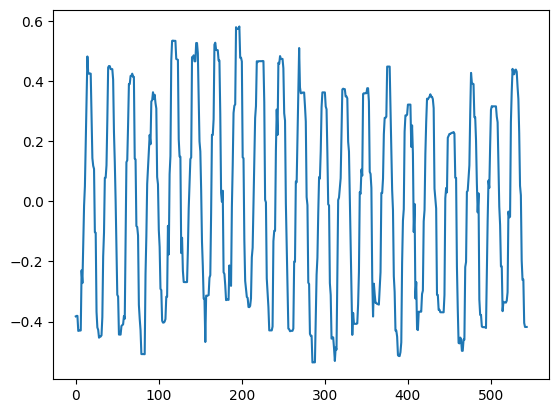

In [50]:

# the signal is given in an array by disp[:, (wrong, ulta, 520, 168), 1], now we want to calculate the fft of this signal
x = disp[:, 312, 351, 0]
x = x - np.mean(x)
plt.plot(x)
fft_result = np.fft.fft(x)
num_samples = x.shape[0]
frequencies = np.fft.fftfreq(num_samples)
magnitude = np.abs(fft_result)
# print(np.max(magnitude))
# plt.stem(frequencies, magnitude, 'b', markerfmt=" ", basefmt="-b")

max_freq_index = np.argmax(magnitude)
print(max_freq_index)
max_freq = frequencies[max_freq_index]
print(max_freq)

plt.show()


In [7]:
print(prev_frame.shape)

(480, 640, 3)


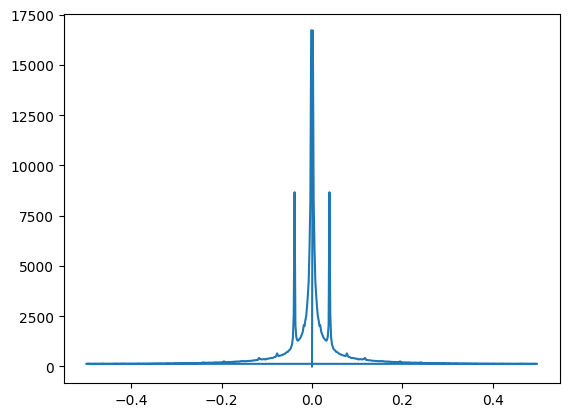

In [39]:
new_img = np.zeros_like(prev_frame)
new_img[:, :, 1] = 255
new_img[:, :, 0] = 255
freq_index = 21

fft_frequencies = None
T = disp.shape[0]
magnitude_sums = np.zeros(T)

for i in range(480):
  for j in range(640):
    x = disp[:, i, j, 0]
    x = x - np.mean(x)
    # plt.plot(x)
    fft_result = np.fft.fft(x)
    num_samples = x.shape[0]
    frequencies = np.fft.fftfreq(num_samples)
    magnitude = np.abs(fft_result)

    fft_frequencies = frequencies
    magnitude_sums += magnitude

    max_magnitude = magnitude[freq_index]

    angle = np.angle(fft_result)[freq_index]
    new_img[i, j, 0] = angle
    new_img[i, j, 2] = max_magnitude

magnitude_sums /= T
plt.plot(fft_frequencies, magnitude_sums)


new_img[:, :, 2] = cv2.normalize(new_img[:, :, 2], None, 0, 255, cv2.NORM_MINMAX)
flow_rgb = cv2.cvtColor(new_img, cv2.COLOR_HSV2BGR)

# plt.imshow(flow_rgb)
plt.show()


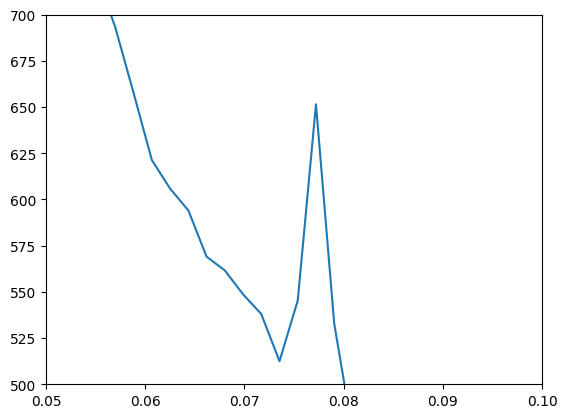

In [30]:
# zoomed in plot for the next best frequency, just for trying
plt.plot(fft_frequencies, magnitude_sums)
plt.ylim(500, 700)
plt.xlim(0.05, 0.1)
plt.show()

In [41]:
main_index = np.argsort(magnitude_sums)[::-1][2]
# print(magnitude_sums[index])
# main_index = 0
# count = 0
# for i in range(1, index.shape[0] - 1):
#   if ((magnitude_sums[i] > magnitude_sums[i - 1]) & (magnitude_sums[i] > magnitude_sums[i + 1])):
#     main_index = i
#     count += 1

#   if count > 1:
#     break

print(main_index)
print()
print(fft_frequencies[main_index])
print()
print(magnitude_sums[main_index])

21

0.03860294117647059

8663.942196117137


In [42]:
w_index = 21
best_mode = []
for i in range(480):
  for j in range(640):
    x = disp[:, i, j, 0]
    x = x - np.mean(x)
    # plt.plot(x)
    fft_result = np.fft.fft(x)
    best_mode.append(fft_result[w_index])

best_mode = np.array(best_mode)

Using their modal coordinate equation

[[    0.             0.        ]
 [    0.            57.34057128]
 [   57.34057128    57.29630099]
 ...
 [-8417.95969563  -111.70748612]
 [-8529.66718176   -99.0769067 ]
 [-8628.74408845   -86.28961377]]


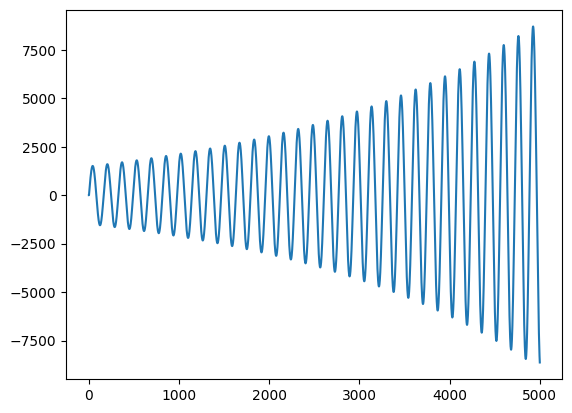

In [78]:
# now we get the modal coordinates as an equation of time, we dont really care about the modal velocities for now?
# no, we do, as the modal coordinate (displacement) also requires the modal velocities of the previous timestep

a = 1
p = [312, 351] # point of application of force
d = [0.5, 1] # x and y component
f_i = d[0] * np.abs(best_mode[p[0] * 640 + p[1]])
f = f_i

t = 5000
y = np.zeros((t + 1, 2)) # assuming the intial modal velocities are 0, cuz x=phi*q, and we assumed that x is 0 in the beginning
h = 1 # we had assumed time stamp is 1 in the x+vt
d = 0.01
m = 1
w = 0.03860294117647059


m1 = np.array([[1, h], [-w**2 * h, 1 - 2*d*w*h]])
m2 = np.array([0, h/m])
for i in range(t):
  if(i != 0):
    f = 0
  y[i + 1] = (m1 @ y[i].T) + (m2.T * f)
  y[i + 1] = y[i + 1].T


print(y)
plt.plot(y[:, 0])


Finding phi (modal matrix)

In [1]:
final_destination = np.zeros((t, 480*640))

for i in range(t):
  q = np.complex(y[i][0], (y[i][1] / w))
  final_destination[i, :] = (q * best_mode).real

print(final_destination.shape)

NameError: ignored

In [ ]:
p2 = [312, 351]
ans = final_destination[:, p2[0] * 640 + p2[1]]
plt.plot(ans[::10])